In [1]:
import os.path as osp
import numpy as np
import numpy.linalg as npla
np.set_printoptions(6, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.serif": ["Helvetica"],
    'font.size': 7,
})

import utils


def load_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        pose = np.eye(4)
        pose[:3, :] = v.reshape(3, 4)
        poses.append(pose)
    return np.array(poses)


def plot_pred_poses(ax, pred_poses, gt_poses, label, color, xlim=None, ylim=None):
    # T_gt_pred = utils.align_path(gt_poses, pred_poses)
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3] / 1e3, pred_poses[:, 1, 3] / 1e3, label=label, linewidth=1.0, color=color)
    max_x = np.max(pred_poses[:, 0, 3] / 1e3)
    min_x = np.min(pred_poses[:, 0, 3] / 1e3)
    max_y = np.max(pred_poses[:, 1, 3] / 1e3)
    min_y = np.min(pred_poses[:, 1, 3] / 1e3)
    mid_x = (max_x + min_x) / 2
    mid_y = (max_y + min_y) / 2
    range_x = max_x - min_x
    range_y = max_y - min_y
    longer = max(range_x, range_y)
    longer *= 1.1

    interval = 1
    left = ((mid_x - longer / 2) // interval) * interval
    right = ((mid_x + longer / 2) // interval + 1) * interval
    top = ((mid_y + longer / 2) // interval + 1) * interval
    bottom = ((mid_y - longer / 2) // interval) * interval
    ax.xaxis.set_ticks(np.arange(left, right, interval))
    ax.yaxis.set_ticks(np.arange(bottom, top, interval))

    if xlim is None:
        ax.set_xlim(mid_x - longer / 2, mid_x + longer / 2)
    else:
        ax.set_xlim(*xlim)
    if ylim is None:
        ax.set_ylim(mid_y - longer / 2, mid_y + longer / 2)
    else:
        ax.set_ylim(*ylim)


gt_path = '/home/ywu/ASRL/steam_icp/data/aeva/'
pred_path = '/home/ywu/ASRL/steam_icp/src/results/aeva_long/'

In [2]:
### compute trajectory distance
sequences = [
    '04',  # Ontario Highway 7
    '05',  # Ontario Highway 404
    '06',  # Don Valley Parkway
    '07',  # Ontario Highway 427
]

for sequence in sequences:
  print(f"{sequence}:")
  gt_poses = load_poses(osp.join(gt_path, sequence, 'aeva_poses.txt'))
  distance = utils.trajectory_distances(gt_poses)[-1]
  print(f"  distance: {distance}")

04:
  distance: 8877.856098123526
05:
  distance: 7838.034421073895
06:
  distance: 10311.7129313709
07:
  distance: 7240.2102070677665


In [3]:
### compute kitti metric
sequences = [
    '04',  # Ontario Highway 7
    '05',  # Ontario Highway 404
    '06',  # Don Valley Parkway
    '07',  # Ontario Highway 427
]
methods = ["doppler_icp", "elastic_icp", "steam_icp", "steam_dicp"]
load_gt_fn = lambda sequence: load_poses(osp.join(gt_path, sequence, 'aeva_poses.txt'))[60:]
load_pred_fn = lambda sequence, pred_file: load_poses(osp.join(pred_path, pred_file, sequence + '_poses.txt'))[60:]
utils.print_results(sequences, methods, load_gt_fn, load_pred_fn)


doppler_icp
  04   05   06   07 
elastic_icp
  04   05   06   07 
steam_icp
  04   05   06   07 
steam_dicp
  04   05   06   07 


kitti metric t_err_3d
doppler_icp  & 3.86 & 2.81 & 2.13 & 2.93  & 3.00
elastic_icp  & 0.34 & 0.34 & 0.41 & 0.48  & 0.38
steam_icp  & 0.38 & 0.29 & 0.36 & 0.36  & 0.35
steam_dicp  & 0.33 & 0.46 & 0.30 & 0.37  & 0.36

kitti metric r_err_3d
doppler_icp  & 0.0115 & 0.0104 & 0.0079 & 0.0060  & 0.0093
elastic_icp  & 0.0010 & 0.0012 & 0.0014 & 0.0015  & 0.0012
steam_icp  & 0.0012 & 0.0009 & 0.0011 & 0.0012  & 0.0011
steam_dicp  & 0.0010 & 0.0013 & 0.0009 & 0.0012  & 0.0011

frame-to-frame metric t_err_3d
doppler_icp  & 0.0864 & 0.0485 & 0.0140 & 0.2355  & 0.1181
elastic_icp  & 0.0195 & 0.0202 & 0.0198 & 0.0216  & 0.0202
steam_icp  & 0.0211 & 0.0250 & 0.0230 & 0.0298  & 0.0244
steam_dicp  & 0.0064 & 0.0119 & 0.0081 & 0.0201  & 0.0119

frame-to-frame metric r_err_3d
doppler_icp  & 0.0563 & 0.0454 & 0.0652 & 0.0565  & 0.0560
elastic_icp  & 0.0460 & 0.0400 & 0.0580 &

In [4]:
### compute kitti metric
sequences = [
    '04',  # Ontario Highway 7
    '05',  # Ontario Highway 404
    '06',  # Don Valley Parkway
    '07',  # Ontario Highway 427
]
methods = ["doppler_icp_40m", "elastic_icp_40m", "steam_icp_40m", "steam_dicp_40m"]
load_gt_fn = lambda sequence: load_poses(osp.join(gt_path, sequence, 'aeva_poses.txt'))[60:]
load_pred_fn = lambda sequence, pred_file: load_poses(osp.join(pred_path, pred_file, sequence + '_poses.txt'))[60:]
utils.print_results(sequences, methods, load_gt_fn, load_pred_fn)


doppler_icp_40m
  04   05   06   07 
elastic_icp_40m
  04   05   06   07 
steam_icp_40m
  04   05   06   07 
steam_dicp_40m
  04   05   06   07 


kitti metric t_err_3d
doppler_icp_40m  & 13.73 & 6.29 & 2.72 & 6.95  & 7.96
elastic_icp_40m  & 10.90 & 56.44 & 66.64 & 5.39  & 33.87
steam_icp_40m  & 67.48 & 3.48 & 2.57 & 3.99  & 24.50
steam_dicp_40m  & 2.25 & 3.11 & 2.28 & 2.27  & 2.44

kitti metric r_err_3d
doppler_icp_40m  & 0.0350 & 0.0224 & 0.0103 & 0.0113  & 0.0213
elastic_icp_40m  & 0.0315 & 0.2084 & 0.2243 & 0.0165  & 0.1159
steam_icp_40m  & 0.1218 & 0.0087 & 0.0072 & 0.0076  & 0.0455
steam_dicp_40m  & 0.0062 & 0.0090 & 0.0069 & 0.0071  & 0.0072

frame-to-frame metric t_err_3d
doppler_icp_40m  & 0.2555 & 0.1679 & 0.0198 & 0.4047  & 0.2444
elastic_icp_40m  & 0.0857 & 1.9122 & 1.8926 & 0.0637  & 1.3279
steam_icp_40m  & 1.6030 & 0.1107 & 0.0644 & 0.1778  & 0.9056
steam_dicp_40m  & 0.0173 & 0.0337 & 0.0211 & 0.0453  & 0.0297

frame-to-frame metric r_err_3d
doppler_icp_40m  & 0.0918 & 0

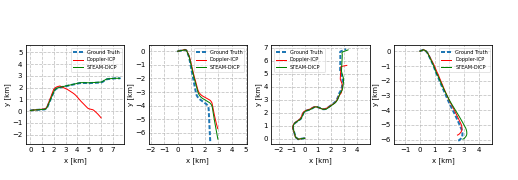

In [5]:
sequences = [
    '04',  # Ontario Highway 7
    '05',  # Ontario Highway 404
    '06',  # Don Valley Parkway
    '07',  # Ontario Highway 427
]

fig, axs = plt.subplots(1, len(sequences), figsize=(7.2, 2.5))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.0, top=0.95, wspace=0.25, hspace=0.25)

for i, sequence in enumerate(sequences):
  ax = axs[i]

  gt_poses = load_poses(osp.join(gt_path, sequence, 'aeva_poses.txt'))[60:]
  ax.plot(gt_poses[:, 0, 3] / 1e3, gt_poses[:, 1, 3] / 1e3, "--", label='Ground Truth', linewidth=2.0, dashes=(2, 1))

  pred_file = 'doppler_icp'
  pred_poses = load_poses(osp.join(pred_path, pred_file, sequence + '_poses.txt'))[60:]
  plot_pred_poses(ax, pred_poses, gt_poses, 'Doppler-ICP', 'red')

  # pred_file = 'elastic_icp'
  # pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence + '_poses.txt'))[60:]
  # plot_pred_poses(ax, pred_poses, gt_poses, r'CT-ICP', 'darkorange')

  pred_file = 'steam_dicp'
  pred_poses = load_poses(osp.join(pred_path, pred_file, sequence + '_poses.txt'))[60:]
  plot_pred_poses(ax, pred_poses, gt_poses, 'STEAM-DICP', 'green')

  ax.set_xlabel('x [km]')
  ax.set_ylabel('y [km]', labelpad=1)
  ax.grid(which='both', linestyle='--', alpha=0.75)
  ax.set_aspect('equal', 'box')
  ax.legend(framealpha=0.5, fontsize=5)
  ax.tick_params(axis=u'both', which=u'both', length=0)

# plt.savefig('/home/yuchen/ASRL/notes/2023-icra-wu/figs/boreas_qualitative.pdf', format="pdf", bbox_inches="tight")
# plt.savefig('/home/yuchen/asrl/steam_icp/full_range.pdf', format="pdf", bbox_inches="tight")
plt.show()

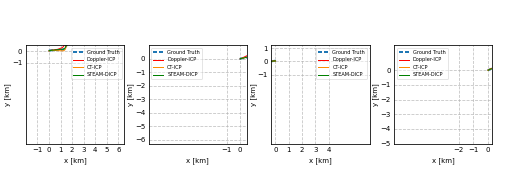

In [7]:
sequences = [
    '04',  # Ontario Highway 7
    '05',  # Ontario Highway 404
    '06',  # Don Valley Parkway
    '07',  # Ontario Highway 427
]

fig, axs = plt.subplots(1, len(sequences), figsize=(7.2, 2.5))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.0, top=0.95, wspace=0.25, hspace=0.25)

xlims = [(-2.0, 6.5), (-6.8, 0.5), (-0.3, 7.1), (-6.4, 0.3)]
ylims = [(-8.0, 0.5), (-6.3, 1.0), (-6.2, 1.2), (-5.0, 1.7)]

for i, sequence in enumerate(sequences):
  ax = axs[i]

  gt_poses = load_poses(osp.join(gt_path, sequence, 'aeva_poses.txt'))[60:]
  ax.plot(gt_poses[:, 0, 3] / 1e3, gt_poses[:, 1, 3] / 1e3, "--", label='Ground Truth', linewidth=2.0, dashes=(2, 1))

  pred_file = 'doppler_icp_40m'
  pred_poses = load_poses(osp.join(pred_path, pred_file, sequence + '_poses.txt'))[60:]
  plot_pred_poses(ax, pred_poses, gt_poses, 'Doppler-ICP', 'red', xlims[i], ylims[i])

  pred_file = 'elastic_icp_40m'
  pred_poses = load_poses(osp.join(pred_path, pred_file, sequence + '_poses.txt'))[60:]
  plot_pred_poses(ax, pred_poses, gt_poses, r'CT-ICP', 'darkorange', xlims[i], ylims[i])

  pred_file = 'steam_dicp_40m'
  pred_poses = load_poses(osp.join(pred_path, pred_file, sequence + '_poses.txt'))[60:]
  plot_pred_poses(ax, pred_poses, gt_poses, 'STEAM-DICP', 'green', xlims[i], ylims[i])

  ax.set_xlabel('x [km]')
  ax.set_ylabel('y [km]', labelpad=1)
  ax.grid(which='both', linestyle='--', alpha=0.75)
  ax.set_aspect('equal', 'box')
  ax.legend(framealpha=0.5, fontsize=5)
  ax.tick_params(axis=u'both', which=u'both', length=0)

# plt.savefig('/home/yuchen/ASRL/notes/2023-icra-wu/figs/boreas_qualitative.pdf', format="pdf", bbox_inches="tight")
# plt.savefig('/home/yuchen/ASRL/steam_icp/40m.pdf', format="pdf", bbox_inches="tight")
plt.show()

## TODO: Fix this plot